# Pergunta 1 - Resíduos per Capita

O objetivo deste exercício é representar, através de um diagrama de barras, a produção de _resíduos per capita_ nos países `IT- Italia`, `UK - Reino Unido` e `GR - Grecia`, nos anos 2004 e 2018.

In [290]:
library(xlsx)
library(ggplot2)
library(gridExtra)
library(dplyr) # for renaming columns

In [291]:
df <- read.xlsx("ResiduosPerCapita.xlsx", sheetName = "Quadro")
df <- df[8:39, 1:3] # only get the needed columns and rows from the excel sheet
colnames(df) <- df[1,] # set the column names to the first row
df <- df[-1,] # remove the (now irrelevant) first row
df <- rename(df, "Países" = "Anos", "Resíduos_per_Capita" = "┴ 2018")
df$"2004" <- as.numeric(df$"2004")
df$"Resíduos_per_Capita" <- as.numeric(df$"Resíduos_per_Capita")

In [292]:
# select only the rows where "Países" matches one of "IT - Itália", "UK - Reino Unido" or "GR - Grécia"
df <- df[df$"Países" %in% c("IT - Itália", "UK - Reino Unido", "GR - Grécia"), ]

df <- rbind(df, df) # bind df into itself
# create a new column called "Ano" containing the respective years
df$"Ano" <- c("2004", "2004", "2004", "2018", "2018", "2018")
df[1:3, "Resíduos_per_Capita"] <- df[1:3, "2004"]
df <- df[, !(colnames(df) %in% c("2004"))] # drop the "2004" column

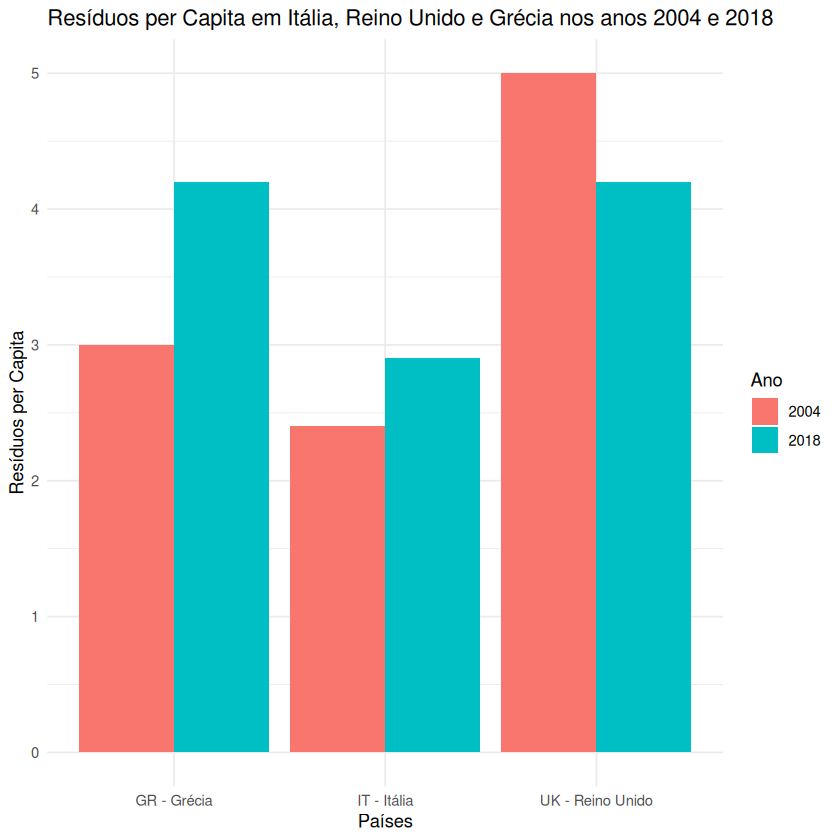

In [293]:
# plot a bar plot with side by side bars, where x axis is "Países" and y axis is "Resíduos per Capita", with fill being "Ano"
ggplot(df, aes(x = Países, y = Resíduos_per_Capita, fill = Ano)) + 
  geom_bar(stat = "identity", position = position_dodge()) + 
  theme_minimal() +
  labs(x = "Países", y = "Resíduos per Capita") +
  ggtitle("Resíduos per Capita em Itália, Reino Unido e Grécia nos anos 2004 e 2018")

Podemos observar que a produção de _resíduos per capita_ decresceu no Reino Unido e aumentou em Itália e na Grécia (sendo o maior aumento na Grécia), estando em 2018 a Grécia e o Reino Unido lado a lado na produção desses mesmos resíduos.

Realizado por: Diogo Gaspar, 99207, LEIC-A